### Importando as bibliotecas e DataSet

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import seaborn as sns

publi = pd.read_csv(r'C:\Users\harol\Downloads\Advertising.csv', index_col=0)
publi.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
print(publi.shape)

(200, 4)


In [3]:
x = publi [['TV','radio','newspaper']]
y = publi ['sales']

In [4]:
x.shape

(200, 3)

In [5]:
y.shape

(200,)

#### Lembrete: método pairplot gera um gráfico para cadas variável independente

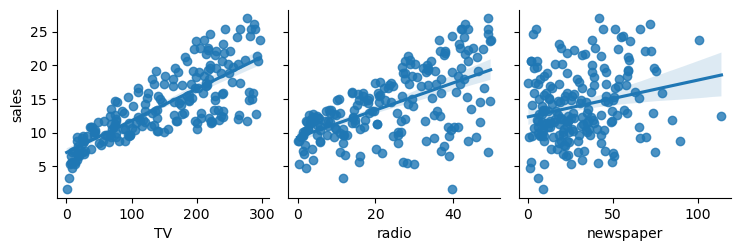

In [6]:

sns.pairplot(publi, x_vars=['TV','radio','newspaper'], y_vars=['sales'],kind='reg')


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [8]:
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

### Coeficientes: Aumento nas nevdas para cada 1 unid investida em publicidade

In [9]:
list(zip(['TV','radio','newspaper'],reglin.coef_))

[('TV', 0.04578472278664572),
 ('radio', 0.18951545105381987),
 ('newspaper', -0.0013079514681381343)]

### Previsão

In [10]:
y_prev = reglin.predict(x_test)
print(y_prev)

[ 9.32611496 17.94475015 21.7391382  10.83176483 17.33009486 11.44353713
  9.65477222 16.50756444 17.36498102 12.36877374 11.46571663 13.7244298
 20.31405788 15.16144942 19.95381656 21.60430738 15.09180447 15.39174513
 14.16321616 15.63709778  8.73901563 14.34515201 14.9936485   9.68659349
 18.98126971  7.37823815 12.767553   15.27968464 18.43424358 18.50652117
  9.12597331 24.80511201 23.23033825  3.55679158  8.14564128 14.93727697
 12.61733747 11.33086621 18.63854515 14.43323863 14.71977422 14.62261555
 10.38437108 10.47092796 12.11734337  5.7152125   9.66484885 12.31030449
 23.27784852 17.04255697 16.24605545 12.27641661 13.55861097  6.46746871
  9.9828731   8.80959974 18.09380593  9.76506934 16.77275567 18.23206574]


## Avaliação da Performance

### MAE (Mean absolute error)

In [11]:
from sklearn import metrics

In [12]:
print(metrics.mean_absolute_error(y_test, y_prev))

1.1230321614623369


### MSE (Mean squared error)

In [13]:
print(metrics.mean_squared_error(y_test, y_prev))

1.9218849050067113


### RMSE ( Root Mean squared error)

In [14]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_prev)))

1.3863206357140874


## Realizando Teste das Variáveis

In [15]:
testes = [['TV','radio','newspaper'], ['radio','newspaper'], ['TV','newspaper'], ['TV','radio']]
vencedor = {'teste': '', 'performance': None}
primeira_verificacao = True

In [16]:
for teste in testes:
    x = publi [teste]
    y = publi ['sales']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=5)
    reglin = LinearRegression()
    reglin.fit(x_train, y_train)
    y_prev = reglin.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prev))
    
    print('Teste:')
    print(teste)
    print('Performance: ')
    print(rmse)
    print('---------------------------------------')
    
    if(primeira_verificacao):
        vencedor['teste'] = teste
        vencedor['performance'] = rmse
        primeira_verificacao = False
    else:
        if(rmse < vencedor['performance']):
            vencedor['teste'] = teste
            vencedor['performance'] = rmse


print('**** Melhor Resultado: *****')
print(vencedor['teste'])
print('Performance: ')
print(vencedor['performance'])
        

Teste:
['TV', 'radio', 'newspaper']
Performance: 
1.582531680202876
---------------------------------------
Teste:
['radio', 'newspaper']
Performance: 
4.044704848174974
---------------------------------------
Teste:
['TV', 'newspaper']
Performance: 
3.0951606645546454
---------------------------------------
Teste:
['TV', 'radio']
Performance: 
1.5821239241271168
---------------------------------------
**** Melhor Resultado: *****
['TV', 'radio']
Performance: 
1.5821239241271168
